In [1]:
print("Hello Welcome to Potato Leaves Diease Detection Project")

Hello Welcome to Potato Leaves Diease Detection Project


In [30]:
# Installation of the libraries

!pip install tensorflow
!pip install matplotlib


[notice] A new release of pip available: 22.3 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
!pip install tensorflow



[notice] A new release of pip available: 22.3 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# importing required libraries


import matplotlib.pyplot as plt

In [5]:
# importing required libraries
import tensorflow as tf


In [7]:

# Defining directory path of our datasets

import os
print("Currect dir", os.getcwd())
curr_dir = os.getcwd()

train_path = os.path.join(curr_dir, "Datasets","Train" )
print("Train path : ", train_path)

test_path = os.path.join(curr_dir, "Datasets","Test" )
print("Test path : ", test_path)

valid_path = os.path.join(curr_dir, "Datasets","Valid" )
print("Valid path : ", valid_path)

Currect dir c:\Users\Rohit\Desktop\AICTE_AI_Project\Potato-Disease-Detection
Train path :  c:\Users\Rohit\Desktop\AICTE_AI_Project\Potato-Disease-Detection\Datasets\Train
Test path :  c:\Users\Rohit\Desktop\AICTE_AI_Project\Potato-Disease-Detection\Datasets\Test
Valid path :  c:\Users\Rohit\Desktop\AICTE_AI_Project\Potato-Disease-Detection\Datasets\Valid


In [23]:

# importing datasets into files for training


training_set = tf.keras.utils.image_dataset_from_directory(

    train_path,
    labels="inferred",
    label_mode="categorical", 
    color_mode="rgb",
    image_size=(128, 128), # size of image
    shuffle=True,
    interpolation="bilinear",  # resizing of images - natural resizing - bilinear : smooth transition
)

Found 900 files belonging to 3 classes.


In [9]:
training_set.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [10]:

# importing datasets into files for validation


validation_set = tf.keras.utils.image_dataset_from_directory(

    valid_path,
    labels="inferred",
    label_mode="categorical", 
    color_mode="rgb",
    image_size=(128, 128), # size of image
    shuffle=True,
    interpolation="bilinear",
)

Found 300 files belonging to 3 classes.


In [11]:

# Creation of Neural network using keras model

# CNN convolution neural netwoek is used to image classification and feature Extraction
# It has convolution layers which extracts the features from the image 
# Activation function : Relu is used it adds non-linearity to linear complex patterns
# Polling techniques are used to reducw the image dimension and retaining the most imp features
# Drop out layers- dropping the neurons are used to avoid overfitting 

cnn = tf.keras.Sequential()

# Addition of convolution layers

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))

# execute this code with different filter sizes

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))


cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))     


cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))

# formmation of convolution layers ends here


# Drop out layers- dropping the neurons are used to reduce the  overfitting 
cnn.add(tf.keras.layers.Dropout(0.25))


# it converts 2-D Feature maps into 1-D vector 
cnn.add(tf.keras.layers.Flatten()) # used to convert any dimension img into one Dimention image


cnn.add(tf.keras.layers.Dense(units=1500, activation='relu'))  # It has 1500 neurons
cnn.add(tf.keras.layers.Dropout(0.4))


cnn.add(tf.keras.layers.Dense(units=3, activation='softmax')) # It is used to find the highest probability values od neurons
# According to probability it classifies the neurons



In [12]:

cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'] )

In [13]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
 # Training of Model with the datasets

training_history = cnn.fit(training_set, validation_data= validation_set, epochs=10)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.3669 - loss: 2.2205 - val_accuracy: 0.7067 - val_loss: 0.9825
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 25s 843ms/step - accuracy: 0.5258 - loss: 0.9379 - val_accuracy: 0.5833 - val_loss: 0.8035
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 14s 490ms/step - accuracy: 0.7174 - loss: 0.6114 - val_accuracy: 0.7967 - val_loss: 0.4990
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 14s 491ms/step - accuracy: 0.8231 - loss: 0.4266 - val_accuracy: 0.8467 - val_loss: 0.3866
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 14s 497ms/step - accuracy: 0.8899 - loss: 0.3004 - val_accuracy: 0.8100 - val_loss: 0.4357
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 14s 498ms/step - accuracy: 0.8593 - loss: 0.3427 - val_accuracy: 0.8967 - val_loss: 0.2498
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 522ms/step - accuracy: 0.9364 - loss: 0.1906 - val_accuracy: 0.9033 - val_loss: 0.2050
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 16s 551ms/step - accuracy: 0.9391 - loss: 0.1686 - val_accurac

In [24]:
train_loss, train_acc = cnn.evaluate(training_set) 
print('Training accuracy:', train_acc)

29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 142ms/step - accuracy: 0.9963 - loss: 0.0332
Training accuracy: 0.992222249507904


In [26]:
val_loss, val_acc = cnn.evaluate(validation_set) 
print('Validation accuracy:', val_acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 144ms/step - accuracy: 0.9572 - loss: 0.0991
Validation accuracy: 0.9566666483879089


In [27]:
cnn.save('trained_plant_disease_model.keras')

In [28]:
training_history.history

{'accuracy': [0.3733333349227905,
  0.5522222518920898,
  0.7388888597488403,
  0.8177777528762817,
  0.8577777743339539,
  0.8688889145851135,
  0.9322222471237183,
  0.9466666579246521,
  0.9366666674613953,
  0.9655555486679077],
 'loss': [1.544020175933838,
  0.8808556199073792,
  0.5699427723884583,
  0.4160121977329254,
  0.3578331768512726,
  0.31958097219467163,
  0.18908074498176575,
  0.1492910236120224,
  0.1786649376153946,
  0.10233805328607559],
 'val_accuracy': [0.7066666483879089,
  0.5833333134651184,
  0.79666668176651,
  0.846666693687439,
  0.8100000023841858,
  0.8966666460037231,
  0.903333306312561,
  0.8999999761581421,
  0.903333306312561,
  0.9566666483879089],
 'val_loss': [0.9824902415275574,
  0.8035398125648499,
  0.4990215599536896,
  0.38663893938064575,
  0.4357294738292694,
  0.24975207448005676,
  0.2050013691186905,
  0.24353040754795074,
  0.19617363810539246,
  0.10584355890750885]}

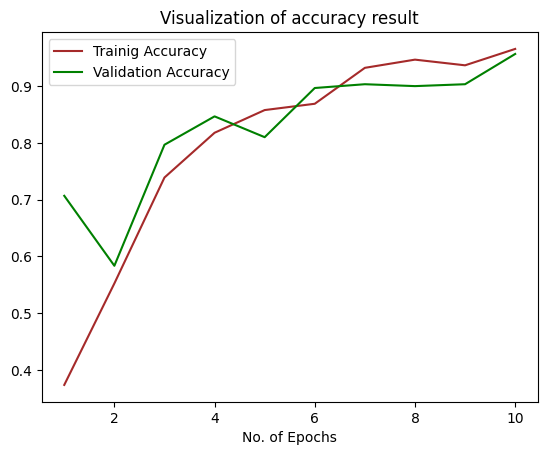

In [29]:
epochs = [i for i in range(1,11)]
plt.plot(epochs, training_history.history['accuracy'], color='brown', label='Trainig Accuracy' )
plt.plot(epochs, training_history.history['val_accuracy'], color='green', label='Validation Accuracy' )
plt.xlabel('No. of Epochs')
plt.title('Visualization of accuracy result')
plt.legend()
plt.show()

96 % Accuracy